<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/2020/week_27/code/X_men.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTIONS
* Which X-Men speak/think more?
* Which X-Men ALWAYS appear in costume?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
char_viz = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-06-30/character_visualization.csv')
char = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-06-30/characters.csv')
comic_bechdel = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-06-30/comic_bechdel.csv')
covers = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-06-30/covers.csv')
issue_colab = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-06-30/issue_collaborators.csv')
locations = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-06-30/locations.csv')

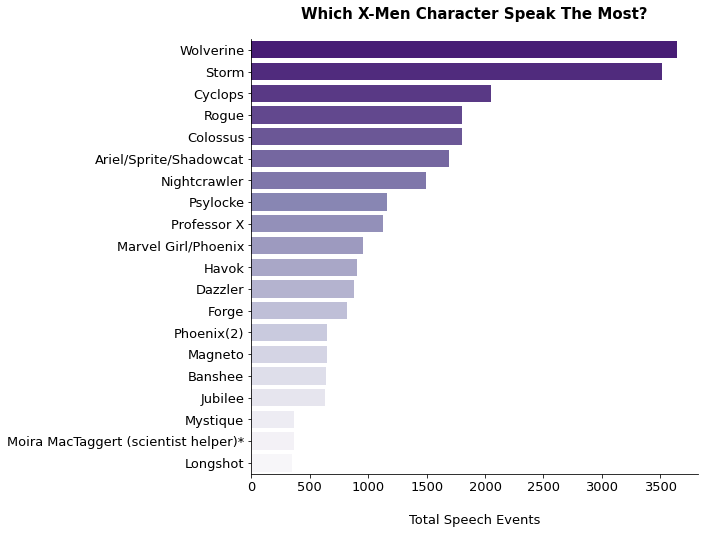

In [3]:
#Function to extract hero name from character column
def hero_name(x):
  return x.split('=')[0].rstrip()

#Apply above function
char_viz['hero_name'] = char_viz['character'].apply(hero_name)

#Groupby hero name to see who thinks/speaks the most
groupby_sum = char_viz.groupby('hero_name').sum().reset_index()
groupby_sum_speech = groupby_sum.sort_values(by = 'speech', ascending = False).head(20)

fig, ax = plt.subplots(figsize = (8,8))
ax = sns.barplot(y = 'hero_name', x = 'speech', data = groupby_sum_speech, orient = 'h', palette = 'Purples_r')


ax.set_ylabel('')
ax.set_xlabel('Total Speech Events', size = 13, labelpad = 20)
ax.set_title('Which X-Men Character Speak The Most?', size = 15, weight = 'bold', pad = 20)
ax.tick_params(axis = 'both', labelsize = 13)
ax = sns.despine()

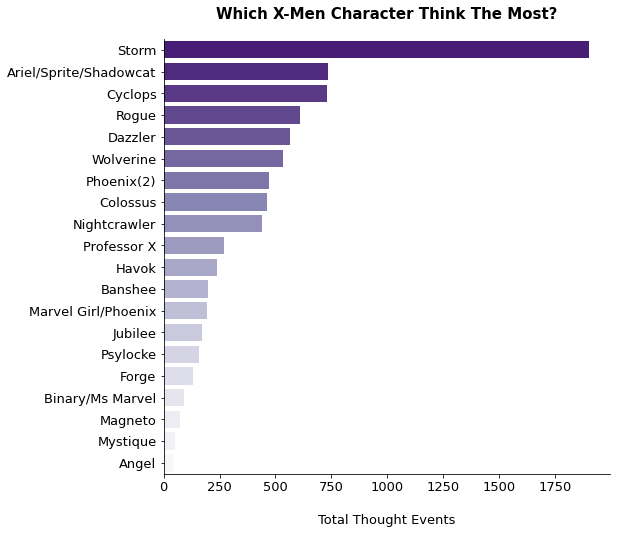

In [4]:
groupby_sum_thought = groupby_sum.sort_values(by = 'thought', ascending = False).head(20)

fig, ax = plt.subplots(figsize = (8,8))
ax = sns.barplot(y = 'hero_name', x = 'thought', data = groupby_sum_thought, orient = 'h', palette = 'Purples_r')


ax.set_ylabel('')
ax.set_xlabel('Total Thought Events', size = 13, labelpad = 20)
ax.set_title('Which X-Men Character Think The Most?', size = 15, weight = 'bold', pad = 20)
ax.tick_params(axis = 'both', labelsize = 13)
ax = sns.despine()

In [ ]:
#Find top 5 most popular characters (based on number of times depicted)

df_popular = char_viz.groupby('hero_name').sum()
df_popular = df_popular.reset_index()

df_popular.sort_values(by = 'depicted', ascending = False).head(5)

,hero_name,issue,speech,thought,narrative,depicted
23,Storm,76244,3517,1900,99,4169
24,Wolverine,76244,3640,532,352,3537
4,Colossus,76244,1800,461,6,2712
5,Cyclops,76244,2052,729,193,2223
17,Nightcrawler,76244,1492,441,6,1839


In [5]:
#Number of time spoken in each issue
df_total_actions = char_viz.groupby(['issue','hero_name']).sum().reset_index()

most_depicted_chars = ['Storm', 'Wolverine', 'Colossus', 'Cyclops', 'Nightcrawler']

char_total_actions = {}

for i in most_depicted_chars:
  for j in ['speech', 'thought', 'narrative', 'depicted']:
    char_total_actions[i, j] = df_total_actions[df_total_actions['hero_name'] == i][j].values

#Array of issues
issues = char_viz['issue'].unique()

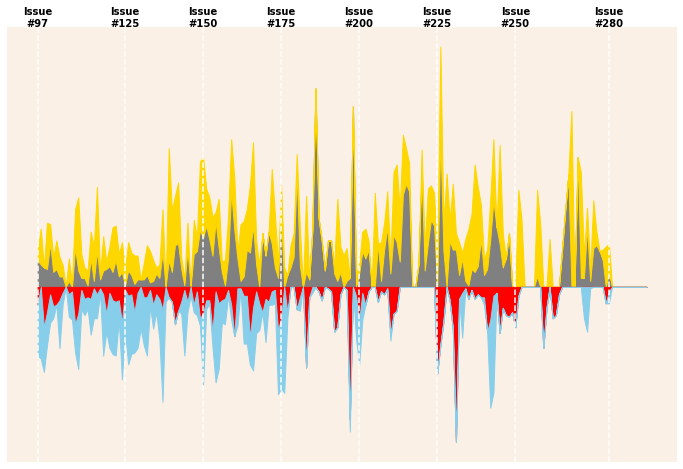

In [6]:
#Data

#Above zero
storm = char_total_actions['Storm', 'speech']
wolverine = char_total_actions['Wolverine', 'speech']

#Below zero
colossus = np.array([-x for x in char_total_actions['Colossus', 'speech']])
cyclops = np.array([-x for x in char_total_actions['Cyclops', 'speech']])


fig, ax = plt.subplots(figsize = (12,8))

######################
##FILL BETWEEN PLOTS##
######################

#Storm
ax.fill_between(issues, storm, color = 'grey')

#Wolverine
ax.fill_between(issues, storm, storm+ wolverine, color = 'gold')

#Colossus
ax.fill_between(issues, colossus, color = 'red')

#Cyclops
ax.fill_between(issues, colossus, colossus + cyclops, color = 'skyblue')



#Formatting

#Text and dashed lines

issue_text = [(97, 'Issue\n#97'), (125, 'Issue\n#125'), (150, 'Issue\n#150'), (175, 'Issue\n#175'), (200, 'Issue\n#200'), (225,'Issue\n#225'), (250, 'Issue\n#250'), (280, 'Issue\n#280')]

for point in issue_text:
  ax.text(point[0], 175, point[1], horizontalalignment='center', size='medium', color='black', weight='semibold')
  ax.axvline(point[0], color = 'white', ls = '--')

#Remove all spines
for i in ['right', 'top', 'left', 'bottom']:
  ax.spines[i].set_visible(False)

#Remove all axis ticks
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

#Change background color
ax.set_facecolor('linen')

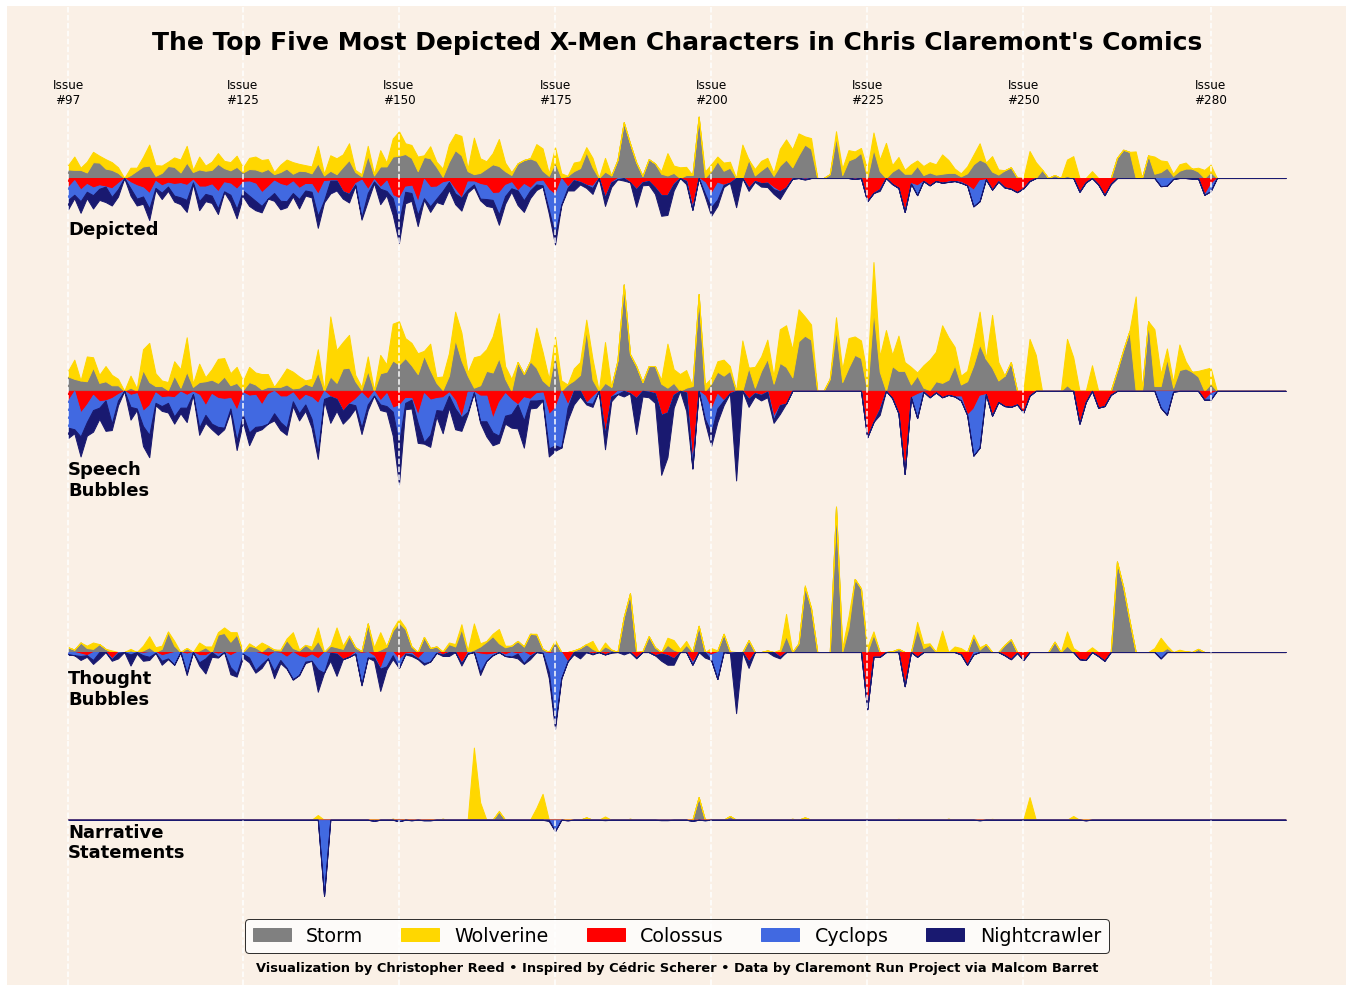

In [7]:
#################
##DEPICTED DATA##
#################
#Above zero
storm_depicted = char_total_actions['Storm', 'depicted']
wolverine_depicted = char_total_actions['Wolverine', 'depicted']

#Below zero
colossus_depicted = np.array([-x for x in char_total_actions['Colossus', 'depicted']])
cyclops_depicted = np.array([-x for x in char_total_actions['Cyclops', 'depicted']])
nightcrawler_depicted = np.array([-x for x in char_total_actions['Nightcrawler', 'depicted']])

###############
##SPEECH DATA##
###############
#Above zero
storm_speech = char_total_actions['Storm', 'speech']
wolverine_speech = char_total_actions['Wolverine', 'speech']

#Below zero
colossus_speech = np.array([-x for x in char_total_actions['Colossus', 'speech']])
cyclops_speech = np.array([-x for x in char_total_actions['Cyclops', 'speech']])
nightcrawler_speech = np.array([-x for x in char_total_actions['Nightcrawler', 'speech']])


################
##THOUGHT DATA##
################

#Above zero
storm_thought = char_total_actions['Storm', 'thought']
wolverine_thought = char_total_actions['Wolverine', 'thought']

#Below zero
colossus_thought = np.array([-x for x in char_total_actions['Colossus', 'thought']])
cyclops_thought = np.array([-x for x in char_total_actions['Cyclops', 'thought']])
nightcrawler_thought = np.array([-x for x in char_total_actions['Nightcrawler', 'thought']])


##################
##NARRATION DATA##
##################

#Above zero
storm_narrative = char_total_actions['Storm', 'narrative']
wolverine_narrative = char_total_actions['Wolverine', 'narrative']

#Below zero
colossus_narrative = np.array([-x for x in char_total_actions['Colossus', 'narrative']])
cyclops_narrative = np.array([-x for x in char_total_actions['Cyclops', 'narrative']])
nightcrawler_narrative = np.array([-x for x in char_total_actions['Nightcrawler', 'narrative']])

##############
##ISSUE DATA##
##############
issue_text = [(97, 'Issue\n#97'), (125, 'Issue\n#125'), (150, 'Issue\n#150'), (175, 'Issue\n#175'), (200, 'Issue\n#200'), (225,'Issue\n#225'), (250, 'Issue\n#250'), (280, 'Issue\n#280')]

##########################
##CREATE FIGURE AND AXES##
##########################
# Create two subplots and unpack the output array immediately (24, 16)
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (24, 18), sharex=True)

##################
##DEPICTED PLOTS##
##################

#Storm
ax1.fill_between(issues, storm_depicted, color = 'grey')

#Wolverine
ax1.fill_between(issues, storm_depicted, storm_depicted + wolverine_depicted, color = 'gold')

#Colossus
ax1.fill_between(issues, colossus_depicted, color = 'red')

#Cyclops
ax1.fill_between(issues, colossus_depicted, colossus_depicted + cyclops_depicted, color = 'royalblue')

#Nightcrawler
ax1.fill_between(issues, colossus_depicted + cyclops_depicted, colossus_depicted + cyclops_depicted + nightcrawler_depicted, color = 'midnightblue')

#Issue formatting
for point in issue_text:
  ax1.text(point[0], 175, point[1], horizontalalignment='center', size='large', color='black',)
  ax1.axvline(point[0], color = 'white', ls = '--')

#Adjust top ylim to account for issue numbers
ax1.set_ylim(top = 400)

#Text
ax1.text(97,-130, 'Depicted', weight = 'bold', fontsize = 18)


################
##SPEECH PLOTS##
################

#Storm
ax2.fill_between(issues, storm_speech, color = 'grey')

#Wolverine
ax2.fill_between(issues, storm_speech, storm_speech + wolverine_speech, color = 'gold')

#Colossus
ax2.fill_between(issues, colossus_speech, color = 'red')

#Cyclops
ax2.fill_between(issues, colossus_speech, colossus_speech + cyclops_speech, color = 'royalblue')

#Nightcrawler
ax2.fill_between(issues, colossus_speech + cyclops_speech, colossus_speech + cyclops_speech + nightcrawler_speech, color = 'midnightblue')

#Issue dashes
for point in issue_text:
  ax2.axvline(point[0], color = 'white', ls = '--')

#Text
ax2.text(97,-130, 'Speech\nBubbles', weight = 'bold', fontsize = 18)

#################
##THOUGHT PLOTS##
#################

#Storm
ax3.fill_between(issues, storm_thought, color = 'grey')

#Wolverine
ax3.fill_between(issues, storm_thought, storm_thought + wolverine_thought, color = 'gold')

#Colossus
ax3.fill_between(issues, colossus_thought, color = 'red')

#Cyclops
ax3.fill_between(issues, colossus_thought, colossus_thought + cyclops_thought, color = 'royalblue')

#Nightcrawler
ax3.fill_between(issues, colossus_thought + cyclops_thought, colossus_thought + cyclops_thought + nightcrawler_thought, color = 'midnightblue')

#Issue formatting
for point in issue_text:
  ax3.axvline(point[0], color = 'white', ls = '--')

#Text
ax3.text(97,-65, 'Thought\nBubbles', weight = 'bold', fontsize = 18)

###################
##NARRATION PLOTS##
###################

#Storm
ax4.fill_between(issues, storm_narrative, color = 'grey', label = 'Storm')

#Wolverine
ax4.fill_between(issues, storm_narrative, storm_narrative + wolverine_narrative, color = 'gold', label = 'Wolverine')

#Colossus
ax4.fill_between(issues, colossus_narrative, color = 'red', label = 'Colossus')

#Cyclops
ax4.fill_between(issues, colossus_narrative, colossus_narrative + cyclops_narrative, color = 'royalblue', label = 'Cyclops')

#Nightcrawler
ax4.fill_between(issues, colossus_narrative + cyclops_narrative, colossus_narrative + cyclops_narrative + nightcrawler_narrative, color = 'midnightblue', label = 'Nightcrawler')

#Issue dashes
for point in issue_text:
  ax4.axvline(point[0], color = 'white', ls = '--')

#Text
ax4.text(97,-80, 'Narrative\nStatements', weight = 'bold', fontsize = 18)

#Extra color to cover credits
ax4.set_ylim(bottom = -350)

#Formatting

#Title
ax1.text(194.5,300,'The Top Five Most Depicted X-Men Characters in Chris Claremont\'s Comics', 
         weight = 'bold', 
         fontsize = 25,
         horizontalalignment = 'center')

#Remove all axes
for ax in f.axes:

  #Remove axis lines (but keeping axis for facecolor)
  for i in ['right', 'top', 'left', 'bottom']:
    ax.spines[i].set_visible(False)
  
  #Remove ticks
  ax.get_xaxis().set_ticks([])
  ax.get_yaxis().set_ticks([])

  #Facecolor
  ax.set_facecolor('linen')

#Remove space between subplots
plt.subplots_adjust(wspace=0, hspace=0)

######################
##LEGEND AND CREDITS##
######################
ax4.legend(ncol = 5, prop = {'size': 19}, edgecolor = 'black', loc = 'center',
           bbox_to_anchor = (0.5,0.2))
ax4.text(194.5, -320, 'Visualization by Christopher Reed • Inspired by Cédric Scherer • Data by Claremont Run Project via Malcom Barret', weight = 'bold', fontsize = 13, horizontalalignment = 'center')

#Save 
plt.savefig('xmen.png', bbox_inches='tight')